In [3]:
# 7.2.1 RNNCell
!pip install --user torchtext==0.10

ERROR: Ignored the following yanked versions: 0.15.0
ERROR: Could not find a version that satisfies the requirement torchtext==0.10 (from versions: 0.1.1, 0.2.0, 0.2.1, 0.2.3, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0)
ERROR: No matching distribution found for torchtext==0.10


In [ ]:
!pip 

C:\Users\user\AppData\Local\Temp\ipykernel_20756\93148411.py:19: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Mon, 20 May 2024   AIC                            411.302
Time:                        15:34:30   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

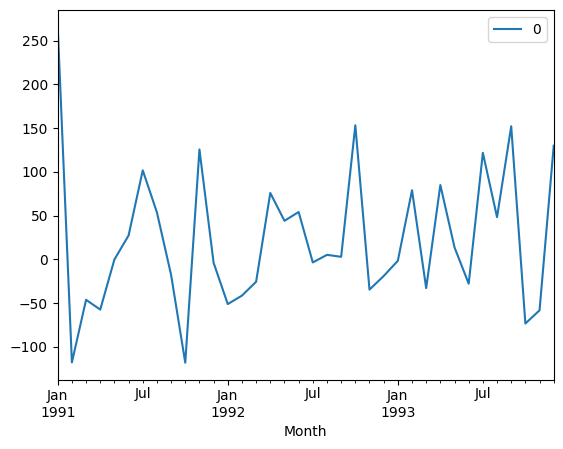

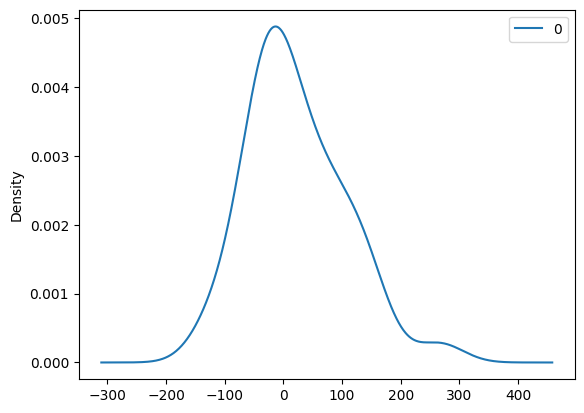

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [1]:
from pandas import read_csv #------ 파이썬 판다스 라이브러리의 read_csv() 메서드를 사용해서 외부 TEXT 파일, CSV 파일을 불러와서 DataFrame으로 저장
from datetime import datetime
# 아래 코드에서 datetime을 to_datetime으로 변경
#from pandas import to_datetime
from pandas import DataFrame
import pandas as pd
#from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

import statsmodels.api as smapi
def parser(x): #------ 시간을 표현하는 함수 정의
    return datetime.strptime('199'+x, '%Y-%m')# ------ strptime()은 날짜와 시간 정보를 문자열로 바꾸어 주는 메서드
#file_uploaded=files.upload()   # chap07/data/SUBX.csv 데이터 불러오기
#data=pd.read_csv('SBUX.csv')
#series = read_csv('/content/drive/MyDrive/Colab Notebooks/파이토치/pytorch2023/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)# ------ 자전거 매출에 대한 CSV 데이터 호출
#model = ARIMA(series, order=(5,1,0))# ------ ARIMA( ) 함수 호출
#model_fit = model.fit(disp=0)# ------ 모형을 적용할 때 많은 디버그 정보가 제공되는데 disp 인수를 0으로 설정하여 이 기능을 비활성화
# CSV 파일 읽기
df = read_csv('data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

# 데이터프레임을 시리즈로 변환
series = df.squeeze()
model = smapi.tsa.arima.ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())# ------ 모델에 대한 정보 표시
residuals = DataFrame(model_fit.resid)# ------ DataFrame에 모델에 대한 오차 정보를 residuals라는 변수에 저장
residuals.plot()# ------ residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

C:\Users\user\AppData\Local\Temp\ipykernel_20756\1227748643.py:15: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


predicted=352.855345, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070415, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


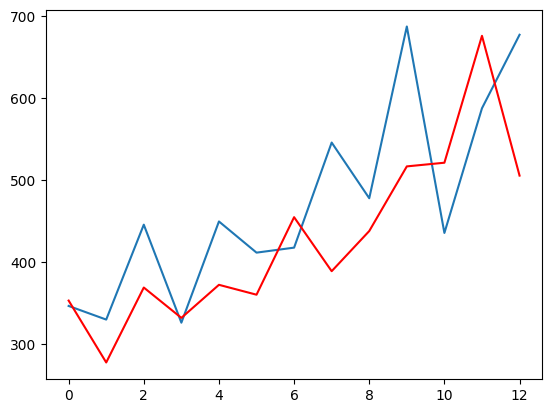

In [2]:
#코드 7-2 statsmodels 라이브러리를 이용한 sales 데이터셋 예측>> 구글링하여 붙여놓기한다

import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
#from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as smapi
def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')
##교재 예제 소스 코드 7장의 data 폴더를 마운트 해야 한다
#series = read_csv('/content/drive/MyDrive/Colab Notebooks/파이토치/pytorch2023/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)
# CSV 파일 읽기
df = read_csv('data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

# 데이터프레임을 시리즈로 변환
series = df.squeeze()
#Series 객체의 값을 추출하여 NumPy 배열 X에 저장합니다.
X = series.values
#NaN 값은 결측치를 나타내는데, 이를 0으로 대체함으로써 결측치 처리를 수행합니다.
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]# ------ train과 test로 데이터셋 분리
history = [x for x in train]
predictions = list()
for t in range(len(test)):# ------ test 데이터셋의 길이(13번)만큼 반복하여 수행
    #model = ARIMA(history, order=(5,1,0)) #------ ARIMA() 함수 호출
    model = smapi.tsa.arima.ARIMA(history, order=(5,1,0))
    #model_fit = model.fit(disp=0)
    model_fit = model.fit()#disp가 지원안됨
    output = model_fit.forecast()# ------ forecast() 메서드를 사용하여 예측 수행
    yhat = output[0]# ------ 모델 출력 결과를 yhat에 저장
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))# ------ 모델 실행 결과를 predicted로 출력하고, test로 분리해 둔 데이터를 expected로 사용하여 출력
error = mean_squared_error(test, predictions)# ------ 손실 함수로 평균 제곱 오차 사용
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [3]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

In [5]:
from torchtext.data import Field, LabelField

In [10]:
start=time.time()
TEXT = Field(tokenize='spacy',tokenizer_language='en_core_web_sm', lower=True, fix_length=200, batch_first=False)
LABEL = LabelField(sequential=False)

In [9]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.0/12.8 MB 495.5 kB/s eta 0:00:26
     --------------------------------------- 0.1/12.8 MB 819.2 kB/s eta 0:00:16
      --------------------------------------- 0.3/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.6/12.8 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.8 MB 4.1 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 7.5 MB/s eta 0:00:02
     --------------- ------------------------ 5.1/12.8 MB 14.2 MB/s eta 0:00:01
     --------------------- ------------------ 7.0/12.8 MB 18.7 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.8 MB 18.1 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.8 MB 17.3 MB/s eta 0:00:01
     -------------------------- ------------- 8.6/12

In [11]:
torch.cuda.is_available()

True

In [16]:

train_data, test_data = torchtext.datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


.data\imdb\aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:41<00:00, 2.05MB/s]


In [17]:
print(vars(train_data.examples[0]))

{'text': ['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', '.', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', ',', 'such', 'as', '"', 'teachers', '"', '.', 'my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', 'high', "'s", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"', 'teachers', '"', '.', 'the', 'scramble', 'to', 'survive', 'financially', ',', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', "'", 'pomp', ',', 'the', 'pettiness', 'of', 'the', 'whole', 'situation', ',', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', '.', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', ',', 'i', 'immediately', 'recalled', '.........', 'at', '..........', 'high', '.', 'a', 'classic', 'l

In [18]:
import string

for example in train_data.examples:
    text = [x.lower() for x in vars(example)['text']] 
    text = [x.replace("<br","") for x in text] 
    text = [''.join(c for c in s if c not in string.punctuation) for s in text] 
    text = [s for s in text if s] 
    vars(example)['text'] = text
    
for example in test_data.examples:
    text = [x.lower() for x in vars(example)['text']]
    text = [x.replace("<br","") for x in text]
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]
    text = [s for s in text if s]
    vars(example)['text'] = text

In [19]:
import random
train_data, valid_data = train_data.split(random_state = random.seed(0), split_ratio=0.8)

In [20]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 20000
Number of validation examples: 5000
Number of testing examples: 25000


In [21]:
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")


Unique tokens in TEXT vocabulary: 10002
Unique tokens in LABEL vocabulary: 2


In [22]:
print(LABEL.vocab.stoi)

defaultdict(None, {'pos': 0, 'neg': 1})


In [24]:
BATCH_SIZE = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

embeding_dim = 100
hidden_size = 300


In [25]:

train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    device = device)

In [26]:
class RNNCell_Encoder(nn.Module): #RNNCell_Encoder 클래스 정의
    ## nn.module를 상속받으면 모델내의 가중치 및 
    def __init__(self, input_dim, hidden_size):
        super(RNNCell_Encoder, self).__init__()
        self.rnn = nn.RNNCell(input_dim, hidden_size)
    ## 순전파
    def forward(self, inputs):
        bz = inputs.shape[1]
        ht = torch.zeros((bz, hidden_size)).to(device)
        #입력 시퀀스의 각 단어에 대해 RNNCell을 반복적으로 적용
        for word in inputs:
            #현재 단어와 이전시점의 은닉상태를 사용하여 RNNCell적용
            ht = self.rnn(word, ht)
        return ht

class Net(nn.Module): #신경망 정의-4개의 층으로 구성
    def __init__(self):
        super(Net, self).__init__()
        self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim)
        self.rnn = RNNCell_Encoder(embeding_dim, hidden_size)
        self.fc1 = nn.Linear(hidden_size, 256) #가중치합산?
        self.fc2 = nn.Linear(256, 3)

    def forward(self, x):
        x = self.em(x)
        x = self.rnn(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [27]:
model = Net()
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [28]:
def training(epoch, model, trainloader, validloader):
    correct = 0
    total = 0
    running_loss = 0

    model.train()
    for b in trainloader:
        x, y = b.text, b.label
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total

    valid_correct = 0
    valid_total = 0
    valid_running_loss = 0

    model.eval()
    with torch.no_grad():
        for b in validloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            valid_correct += (y_pred == y).sum().item()
            valid_total += y.size(0)
            valid_running_loss += loss.item()

    epoch_valid_loss = valid_running_loss / len(validloader.dataset)
    epoch_valid_acc = valid_correct / valid_total

    print('epoch: ', epoch,
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'valid_loss： ', round(epoch_valid_loss, 3),
          'valid_accuracy:', round(epoch_valid_acc, 3)
          )
    return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [29]:
epochs = 5
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch,
                                                                 model,                                                                 train_iterator,                                                                 valid_iterator)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_acc)

end = time.time()
print(end-start)

epoch:  0 loss：  0.011 accuracy: 0.495 valid_loss：  0.011 valid_accuracy: 0.507
epoch:  1 loss：  0.011 accuracy: 0.501 valid_loss：  0.011 valid_accuracy: 0.499
epoch:  2 loss：  0.011 accuracy: 0.513 valid_loss：  0.011 valid_accuracy: 0.497
epoch:  3 loss：  0.011 accuracy: 0.52 valid_loss：  0.011 valid_accuracy: 0.496
epoch:  4 loss：  0.011 accuracy: 0.525 valid_loss：  0.011 valid_accuracy: 0.514
1015.5198156833649


In [30]:
def evaluate(epoch, model, testloader):    
    test_correct = 0
    test_total = 0
    test_running_loss = 0
    
    model.eval()
    with torch.no_grad():
        for b in testloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()

    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total

    print('epoch: ', epoch,
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
          )
    return epoch_test_loss, epoch_test_acc

In [31]:
epochs = 5
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_test_loss, epoch_test_acc = evaluate(epoch,
                                               model,
                                               test_iterator)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

end = time.time()
print(end-start)

epoch:  0 test_loss：  0.011 test_accuracy: 0.502
epoch:  1 test_loss：  0.011 test_accuracy: 0.502
epoch:  2 test_loss：  0.011 test_accuracy: 0.502
epoch:  3 test_loss：  0.011 test_accuracy: 0.502
epoch:  4 test_loss：  0.011 test_accuracy: 0.502
74422.67460370064


### 경사하강법

In [32]:
# 주어진 함수 정의
def func(x):
    return 5 * x ** 2 + 5 * x + 7

# 도함수(미분) 계산
def derivative(x):
    return 10 * x + 5

# 경사 하강법을 사용하여 기울기가 0인 지점 찾기
def gradient_descent(learning_rate, initial_x, epochs):
    x = initial_x
    for _ in range(epochs):
        gradient = derivative(x)
        x = x - learning_rate * gradient
    return x

# 학습률, 초기값, 반복 횟수 설정
learning_rate = 0.01
initial_x = 0.0
epochs = 1000

# 경사 하강법 적용하여 기울기가 0인 지점 찾기
optimal_x = gradient_descent(learning_rate, initial_x, epochs)
optimal_y = func(optimal_x)

# 결과 출력
print("기울기가 0인 x:", optimal_x)
print("해당 지점에서의 y 값:", optimal_y)


기울기가 0인 x: -0.4999999999999997
해당 지점에서의 y 값: 5.75


In [1]:
# 7.2.2. RNN

In [33]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

In [36]:
start=time.time()

TEXT = Field(sequential = True, batch_first = True, lower = True)
LABEL = Field(sequential = False, batch_first = True) 

from torchtext import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)
train_data, valid_data = train_data.split(split_ratio = 0.8)

TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

BATCH_SIZE = 100
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [37]:
train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    device = device)

In [38]:
vocab_size = len(TEXT.vocab)
n_classes = 2  

In [39]:
class BasicRNN(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p = 0.2):
        super(BasicRNN, self).__init__()
        self.n_layers = n_layers 
        self.embed = nn.Embedding(n_vocab, embed_dim) 
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(dropout_p)
        self.rnn = nn.RNN(embed_dim, self.hidden_dim, num_layers = self.n_layers, batch_first = True) 
        self.out = nn.Linear(self.hidden_dim, n_classes) 

    def forward(self, x):
        x = self.embed(x) 
        h_0 = self._init_state(batch_size = x.size(0)) 
        x, _ = self.rnn(x, h_0) 
        h_t = x[:, -1, :] 
        self.dropout(h_t)
        logit = torch.sigmoid(self.out(h_t))
        return logit

    def _init_state(self, batch_size = 1):
        weight = next(self.parameters()).data 
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [40]:
model = BasicRNN(n_layers = 1, hidden_dim = 256, n_vocab = vocab_size, embed_dim = 128, n_classes = n_classes, dropout_p = 0.5)
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [41]:
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1)
        optimizer.zero_grad()

        logit = model(x)
        loss = F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()

        if b % 50 == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(e,
                                                                           b * len(x),
                                                                           len(train_iter.dataset),
                                                                           100. * b / len(train_iter),
                                                                           loss.item()))

In [42]:
def evaluate(model, val_iter):
    model.eval()
    corrects, total, total_loss = 0, 0, 0

    for batch in val_iter:
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1) 
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction = "sum")
        total += y.size(0)
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
        
    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [43]:
BATCH_SIZE = 100
LR = 0.001
EPOCHS = 5
for e in range(1, EPOCHS + 1):
    train(model, optimizer, train_iterator)
    val_loss, val_accuracy = evaluate(model, valid_iterator)
    print("[EPOCH: %d], Validation Loss: %5.2f | Validation Accuracy: %5.2f" % (e, val_loss, val_accuracy))

Train Epoch: 1 [0/20000 (0%)]	Loss: 0.705063
Train Epoch: 1 [5000/20000 (25%)]	Loss: 0.693649
Train Epoch: 1 [10000/20000 (50%)]	Loss: 0.693026
Train Epoch: 1 [15000/20000 (75%)]	Loss: 0.698957
[EPOCH: 1], Validation Loss:  0.69 | Validation Accuracy:  0.50
Train Epoch: 2 [0/20000 (0%)]	Loss: 0.694768
Train Epoch: 2 [5000/20000 (25%)]	Loss: 0.693784
Train Epoch: 2 [10000/20000 (50%)]	Loss: 0.692647
Train Epoch: 2 [15000/20000 (75%)]	Loss: 0.697171
[EPOCH: 2], Validation Loss:  0.69 | Validation Accuracy:  0.50
Train Epoch: 3 [0/20000 (0%)]	Loss: 0.695134
Train Epoch: 3 [5000/20000 (25%)]	Loss: 0.692686
Train Epoch: 3 [10000/20000 (50%)]	Loss: 0.693810
Train Epoch: 3 [15000/20000 (75%)]	Loss: 0.694146
[EPOCH: 3], Validation Loss:  0.69 | Validation Accuracy:  0.50
Train Epoch: 4 [0/20000 (0%)]	Loss: 0.691095
Train Epoch: 4 [5000/20000 (25%)]	Loss: 0.693652
Train Epoch: 4 [10000/20000 (50%)]	Loss: 0.693063
Train Epoch: 4 [15000/20000 (75%)]	Loss: 0.694665
[EPOCH: 4], Validation Loss:  0.

In [44]:
test_loss, test_acc = evaluate(model,test_iterator)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

Test Loss:  0.70 | Test Accuracy:  0.48


In [12]:
# 7.3.2 LSTMCell

In [48]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False
    
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor    

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [49]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (1.0,))
])

In [50]:
from torchvision.datasets import MNIST

download_root = '../chap07/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:17<00:00, 557838.10it/s] 


Extracting ../chap07/MNIST_DATASET\MNIST\raw\train-images-idx3-ubyte.gz to ../chap07/MNIST_DATASET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 137551.03it/s]


Extracting ../chap07/MNIST_DATASET\MNIST\raw\train-labels-idx1-ubyte.gz to ../chap07/MNIST_DATASET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 718744.01it/s] 


Extracting ../chap07/MNIST_DATASET\MNIST\raw\t10k-images-idx3-ubyte.gz to ../chap07/MNIST_DATASET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4557542.77it/s]

Extracting ../chap07/MNIST_DATASET\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../chap07/MNIST_DATASET\MNIST\raw



In [51]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)

In [52]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [53]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)
    
    def forward(self, x, hidden):        
        hx, cx = hidden        
        x = x.view(-1, x.size(1))
        
        gates = self.x2h(x) + self.h2h(hx)    
        gates = gates.squeeze()        
        ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)
        
        ingate = F.sigmoid(ingate)
        forgetgate = F.sigmoid(forgetgate)
        cellgate = F.tanh(cellgate)
        outgate = F.sigmoid(outgate)
        
        cy = torch.mul(cx, forgetgate) +  torch.mul(ingate, cellgate)        
        hy = torch.mul(outgate, F.tanh(cy))        
        return (hy, cy)

In [54]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
         
        self.layer_dim = layer_dim               
        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)          
        self.fc = nn.Linear(hidden_dim, output_dim)
         
    def forward(self, x):        
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

        if torch.cuda.is_available():
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), hidden_dim))
                           
        outs = []        
        cn = c0[0,:,:]
        hn = h0[0,:,:]

        for seq in range(x.size(1)):
            hn, cn = self.lstm(x[:,seq,:], (hn,cn)) 
            outs.append(hn)
                
        out = outs[-1].squeeze()        
        out = self.fc(out) 
        return out

In [55]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  
output_dim = 10
 
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
if torch.cuda.is_available():
    model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [56]:
seq_dim = 28 
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):          
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)
          
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        if torch.cuda.is_available():
            loss.cuda()

        loss.backward()
        optimizer.step()        
        loss_list.append(loss.item())
        iter += 1
         
        if iter % 500 == 0:         
            correct = 0
            total = 0
            for images, labels in valid_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1 , seq_dim, input_dim))
                
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                 
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
             
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.237457275390625. Accuracy: 21.420000076293945
Iteration: 1000. Loss: 0.9134050607681274. Accuracy: 76.52999877929688
Iteration: 1500. Loss: 0.4174923300743103. Accuracy: 89.7699966430664
Iteration: 2000. Loss: 0.23367048799991608. Accuracy: 93.3499984741211
Iteration: 2500. Loss: 0.059751082211732864. Accuracy: 95.94000244140625
Iteration: 3000. Loss: 0.057032905519008636. Accuracy: 95.86000061035156
Iteration: 3500. Loss: 0.1001078262925148. Accuracy: 95.80999755859375
Iteration: 4000. Loss: 0.0215574000030756. Accuracy: 97.16999816894531
Iteration: 4500. Loss: 0.06056617945432663. Accuracy: 97.19000244140625
Iteration: 5000. Loss: 0.11658761650323868. Accuracy: 97.2699966430664
Iteration: 5500. Loss: 0.1488744020462036. Accuracy: 97.06999969482422
Iteration: 6000. Loss: 0.012888068333268166. Accuracy: 97.5199966430664
Iteration: 6500. Loss: 0.024022212252020836. Accuracy: 97.55999755859375
Iteration: 7000. Loss: 0.03163888305425644. Accuracy: 97.95999908447266

In [57]:
def evaluate(model, val_iter):    
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1 , seq_dim, input_dim)).to(device)
                
        logit = model(images).to(device)
        loss = F.cross_entropy(logit, labels, reduction = "sum")
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [58]:
test_loss, test_acc = evaluate(model,test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument target in method wrapper_CUDA_nll_loss_forward)

In [1]:
# 7.3.3 LSTM

# 성공 LSTM

In [70]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split  

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [71]:
torch.cuda.is_available()

True

In [72]:
data=pd.read_csv('../chap07/data/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [73]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [74]:
data['Volume'] = data['Volume'].astype(float)

In [75]:
X=data.iloc[:,:-1]
y=data.iloc[:,5:6]
print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [76]:
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y) 

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [77]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape) 

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [99]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) 
        self.fc = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

In [100]:
# 하이퍼파라미터
input_size = 5  # feature의 개수
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 1000
batch_size = 64
learning_rate = 0.001

In [106]:
model = LSTM(input_size, hidden_size, num_layers, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [107]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad()  
    loss = criterion(outputs, y_train_tensors) 
    loss.backward() 
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.10222
Epoch: 100, loss: 0.01847
Epoch: 200, loss: 0.01731
Epoch: 300, loss: 0.01397
Epoch: 400, loss: 0.01111
Epoch: 500, loss: 0.01069
Epoch: 600, loss: 0.01047
Epoch: 700, loss: 0.01029
Epoch: 800, loss: 0.01016
Epoch: 900, loss: 0.01006


In [108]:
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

In [98]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 
        self.seq_length = seq_length 

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) 
        self.fc_1 =  nn.Linear(hidden_size, 128) 
        self.fc = nn.Linear(128, num_classes) 

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) 
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) 
        
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) 
        hn = hn.view(-1, self.hidden_size) 
        out = self.relu(hn)
        out = self.fc_1(out) 
        out = self.relu(out) 
        out = self.fc(out)
        return out

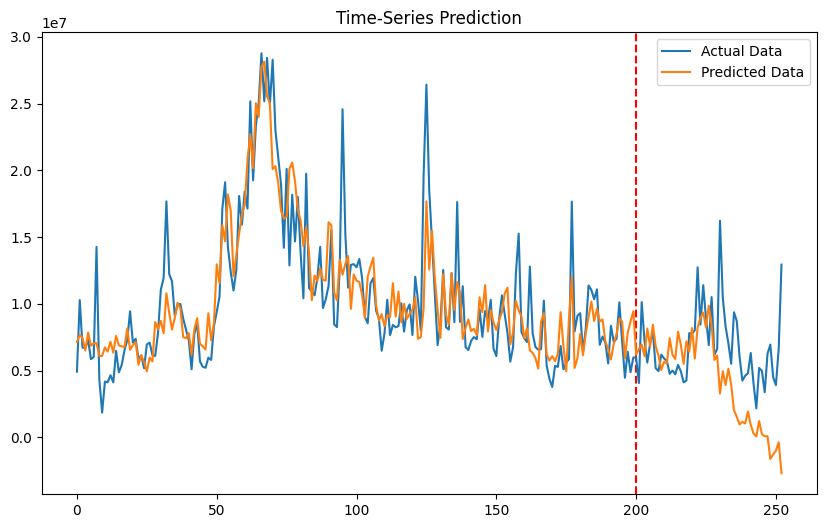

In [109]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

predicted= ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# 에어플레인

In [110]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split  

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [111]:
torch.cuda.is_available()

True

In [112]:
data=pd.read_csv('../chap07/data/AirPassengers.csv')
print(data.dtypes)

Month          object
#Passengers     int64
dtype: object


In [114]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [116]:
data['#Passengers'] = data['#Passengers'].astype(float)

In [118]:
data=data.reset_index()

In [119]:
data

,Month,#Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [172]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size-1]))
    return np.array(feature_list), np.array(label_list)

In [173]:
label=data['#Passengers'].shift(-1)
X, y=make_dataset(data['#Passengers'], label)

In [174]:
print(len(X))
print(len(y))

139
139


In [175]:
X_train.shape

(100, 12)

In [176]:
X_train = X[:100, :]
X_test = X[100:, :]

y_train = y[:100]
y_test = y[100:] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (100, 5) (100,)
Testing Shape (39, 5) (39,)


In [177]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape) 

Training Shape torch.Size([100, 1, 5]) torch.Size([100])
Testing Shape torch.Size([39, 1, 5]) torch.Size([39])


In [178]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

In [180]:
# 하이퍼파라미터
input_size = 5  # feature의 개수
hidden_size = 64
num_layers = 10
output_size = 1
num_epochs = 1000
learning_rate = 0.001

In [181]:
model = LSTM(input_size, hidden_size, num_layers, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [182]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad()  
    loss = criterion(outputs, y_train_tensors) 
    loss.backward() 
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 61375.45703
Epoch: 100, loss: 57344.28125
Epoch: 200, loss: 54536.86328
Epoch: 300, loss: 52169.25000
Epoch: 400, loss: 49983.44922
Epoch: 500, loss: 47920.03125
Epoch: 600, loss: 45954.45312
Epoch: 700, loss: 44073.58594
Epoch: 800, loss: 42269.26562
Epoch: 900, loss: 40535.80078


In [183]:

df_x_ss = Variable(torch.Tensor(X)) 
df_y_ms = Variable(torch.Tensor(y))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

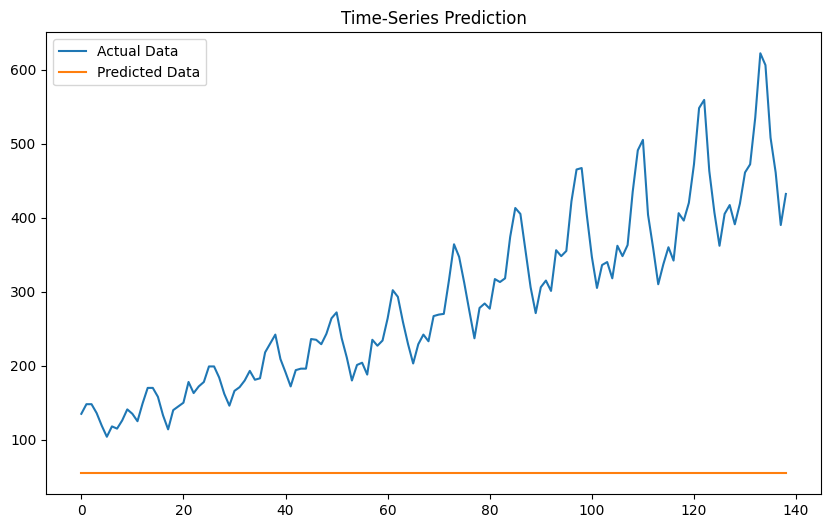

In [185]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

plt.figure(figsize=(10,6)) 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [95]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5 
hidden_size = 2 
num_layers = 5 

num_classes = 1 
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

TypeError: LSTM.__init__() takes 5 positional arguments but 6 were given

In [89]:
len(outputs)

1000

In [87]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad()  
    loss = criterion(outputs, y_train_tensors) 
    loss.backward() 
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

c:\Users\user\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (1000) must match the size of tensor b (200) at non-singleton dimension 0

In [82]:
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

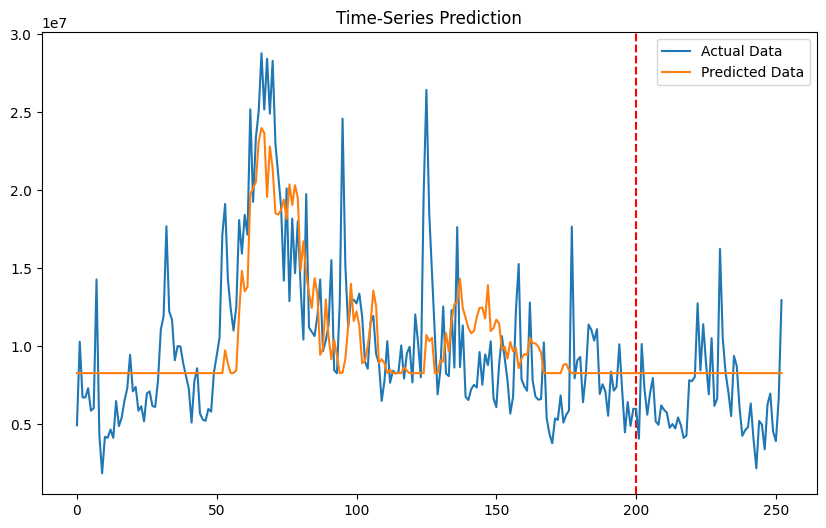

In [83]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

predicted= ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# 전력데이터

In [1]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 

from tqdm.auto import tqdm

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42) # Seed 고정

In [27]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [4]:
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [28]:
# 일조, 일사 열 제거
train_df = train_df.drop(['일조(hr)','일사(MJ/m2)'], axis=1)
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,986.40


In [29]:
# 결측치 확인
train_df.isna().sum()

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
전력소비량(kWh)            0
dtype: int64

In [30]:
# 강수량 결측치 0.0으로 채우기
train_df['강수량(mm)'].fillna(0.0, inplace=True)

# 풍속, 습도 결측치 평균으로 채우고 반올림하기
train_df['풍속(m/s)'].fillna(round(train_df['풍속(m/s)'].mean(),2), inplace=True)
train_df['습도(%)'].fillna(round(train_df['습도(%)'].mean(),2), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23772\111425936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['강수량(mm)'].fillna(0.0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_23772\111425936.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [31]:
train_df['month'] = train_df['일시'].apply(lambda x : float(x[4:6]))
train_df['day'] = train_df['일시'].apply(lambda x : float(x[6:8]))
train_df['time'] = train_df['일시'].apply(lambda x : float(x[9:11]))
train_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),month,day,time
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,1085.28,6.0,1.0,0.0
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,1047.36,6.0,1.0,1.0
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,974.88,6.0,1.0,2.0
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,953.76,6.0,1.0,3.0
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,986.40,6.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,0.0,0.9,86.0,881.04,8.0,24.0,19.0
203996,100_20220824 20,100,20220824 20,22.4,0.0,1.3,86.0,798.96,8.0,24.0,20.0
203997,100_20220824 21,100,20220824 21,21.3,0.0,1.0,92.0,825.12,8.0,24.0,21.0
203998,100_20220824 22,100,20220824 22,21.0,0.0,0.3,94.0,640.08,8.0,24.0,22.0


In [32]:
# 순서 재배치
train_df = train_df[train_df.columns[:7].to_list() + train_df.columns[8:].to_list() + train_df.columns[7:8].to_list()]
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),month,day,time,전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,6.0,1.0,0.0,1085.28
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,6.0,1.0,1.0,1047.36
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,6.0,1.0,2.0,974.88
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,6.0,1.0,3.0,953.76
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,6.0,1.0,4.0,986.40


In [33]:
# 하이퍼파라미터
input_size = 8  # feature의 개수
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 5
window_size = 24  # 예측에 사용될 시간 윈도우 크기
batch_size = 64
learning_rate = 0.001

In [34]:
class TimeSeriesDataset(Dataset):
    def __init__(self, df, window_size):
        self.df = df
        self.window_size = window_size

    def __len__(self):
        return len(self.df) - self.window_size

    def __getitem__(self, idx):
        x = torch.tensor(self.df[idx:idx+self.window_size, :], dtype=torch.float)
        if self.df.shape[1] > 1:
            y = torch.tensor(self.df[idx+self.window_size, -1], dtype=torch.float)
        else:
            y = None
        return x, y

def create_data_loader(df, window_size, batch_size):
    dataset = TimeSeriesDataset(df, window_size)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return data_loader

In [77]:
train=train_df.loc[:len(train_df)-1000,:]
valid=train_df.loc[len(train_df)-1000:,:]

In [79]:
# normalization
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train.drop(['num_date_time', '건물번호', '일시'], axis=1).values)
valid_data=scaler.transform(valid.drop(['num_date_time', '건물번호', '일시'], axis=1).values)
train_loader = create_data_loader(train_data, window_size, batch_size)
valid_loader=create_data_loader(valid_data, window_size, batch_size)

In [80]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"current device: {device}")

model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

current device: cuda


In [82]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).to(device)

        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 300 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

Epoch [1/5], Step [300/3172], Loss: 0.0005
Epoch [1/5], Step [600/3172], Loss: 0.0005
Epoch [1/5], Step [900/3172], Loss: 0.0001
Epoch [1/5], Step [1200/3172], Loss: 0.0025
Epoch [1/5], Step [1500/3172], Loss: 0.0173
Epoch [1/5], Step [1800/3172], Loss: 0.0033
Epoch [1/5], Step [2100/3172], Loss: 0.0001
Epoch [1/5], Step [2400/3172], Loss: 0.0001
Epoch [1/5], Step [2700/3172], Loss: 0.0001
Epoch [1/5], Step [3000/3172], Loss: 0.0027
Epoch [2/5], Step [300/3172], Loss: 0.0015
Epoch [2/5], Step [600/3172], Loss: 0.0003
Epoch [2/5], Step [900/3172], Loss: 0.0002
Epoch [2/5], Step [1200/3172], Loss: 0.0013
Epoch [2/5], Step [1500/3172], Loss: 0.0149
Epoch [2/5], Step [1800/3172], Loss: 0.0024
Epoch [2/5], Step [2100/3172], Loss: 0.0000
Epoch [2/5], Step [2400/3172], Loss: 0.0001
Epoch [2/5], Step [2700/3172], Loss: 0.0002
Epoch [2/5], Step [3000/3172], Loss: 0.0015
Epoch [3/5], Step [300/3172], Loss: 0.0006
Epoch [3/5], Step [600/3172], Loss: 0.0001
Epoch [3/5], Step [900/3172], Loss: 0.00

In [83]:
model.eval()

valid_predictions = []

with torch.no_grad():
    for i in range(valid_data.shape[0] - window_size):
        x = torch.Tensor(valid_data[i:i+window_size,:]).to(device)
        new_x = model(x.view(1,window_size,-1))
        
        valid_data[i+window_size,-1] = new_x # 입력 업데이트
        valid_predictions.append(new_x.detach().cpu().numpy().item()) # 예측 결과 저장

In [84]:
predictions = scaler.inverse_transform(valid_data)[24:,-1] # 원래 scale로 복구
predictions

array([ 959.13189039,  971.98265201, 1011.95674347, 1057.80150798,
       1097.52701592, 1129.10642853, 1138.64147716, 1137.26239883,
       1116.52229125, 1090.47514386, 1041.15571724,  967.13878654,
        892.39376628,  795.62584113,  677.42618029,  573.63410897,
        469.2656809 ,  413.93030515,  377.50512803,  365.83594522,
        379.02302573,  428.48127172,  517.73566971,  625.0673501 ,
        739.46799385,  846.47949714,  950.57446435, 1038.08782816,
       1097.81111137, 1132.55279504, 1157.24650106, 1161.57363944,
       1149.15813636, 1111.84231239, 1057.10684142,  969.42237466,
        870.60121418,  753.73372554,  640.29285347,  534.83039203,
        446.86676731,  394.6642276 ,  360.61189319,  353.56590813,
        367.53690979,  419.11808564,  509.08633043,  621.24953257,
        740.47106349,  857.91984637,  960.68833848, 1050.43515593,
       1112.85145895, 1153.02551866, 1183.27180956, 1194.07389354,
       1167.36626219, 1112.54609431, 1052.68247251,  953.40250

In [85]:
answer=valid.iloc[:,-1]
answer=answer.values

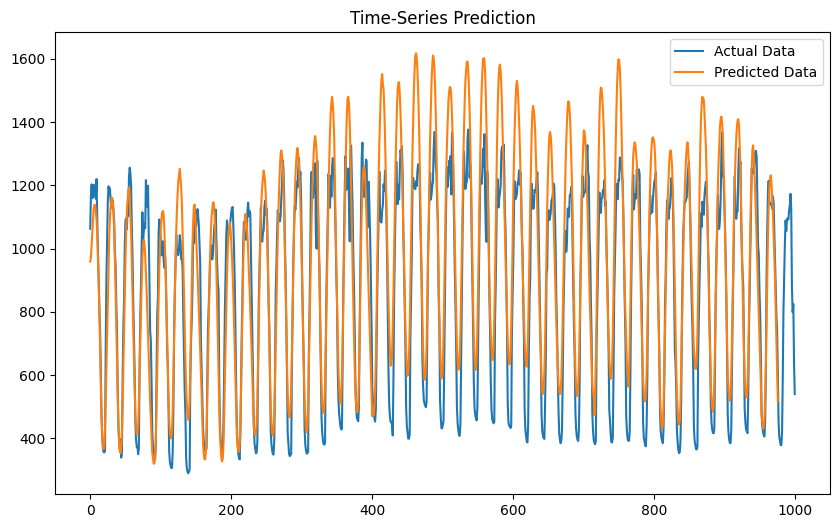

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6)) 


plt.plot(answer, label='Actual Data') 
plt.plot(predictions, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# GRU

In [1]:
# 7.4.2 GURCell

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False
    
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor    

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [3]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (1.0,))
])

In [4]:
from torchvision.datasets import MNIST
download_root = '../chap07/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [5]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)

In [6]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [7]:
class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(GRUCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 3 * hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 3 * hidden_size, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)
    
    def forward(self, x, hidden):        
        x = x.view(-1, x.size(1))
        
        gate_x = self.x2h(x) 
        gate_h = self.h2h(hidden)
        
        gate_x = gate_x.squeeze()
        gate_h = gate_h.squeeze()
        
        i_r, i_i, i_n = gate_x.chunk(3, 1)
        h_r, h_i, h_n = gate_h.chunk(3, 1)
                
        resetgate = F.sigmoid(i_r + h_r)
        inputgate = F.sigmoid(i_i + h_i)
        newgate = F.tanh(i_n + (resetgate * h_n))
        
        hy = newgate + inputgate * (hidden - newgate)              
        return hy

In [8]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim               
        self.gru_cell = GRUCell(input_dim, hidden_dim, layer_dim)                
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
                
        outs = []        
        hn = h0[0,:,:]
        
        for seq in range(x.size(1)):
            hn = self.gru_cell(x[:,seq,:], hn) 
            outs.append(hn)
            
        out = outs[-1].squeeze()        
        out = self.fc(out) 
        return out

In [9]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  
output_dim = 10
 
model = GRUModel(input_dim, hidden_dim, layer_dim, output_dim)
 
if torch.cuda.is_available():
    model.cuda()

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
seq_dim = 28 
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):         
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)
          
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        if torch.cuda.is_available():
            loss.cuda()

        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.item())
        iter += 1
         
        if iter % 500 == 0:         
            correct = 0
            total = 0
            for images, labels in valid_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1 , seq_dim, input_dim))
                
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
             
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

e:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
e:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Iteration: 500. Loss: 1.661692500114441. Accuracy: 43.59000015258789
Iteration: 1000. Loss: 0.8945671319961548. Accuracy: 76.19999694824219
Iteration: 1500. Loss: 0.29147762060165405. Accuracy: 89.7300033569336
Iteration: 2000. Loss: 0.23627924919128418. Accuracy: 93.51000213623047
Iteration: 2500. Loss: 0.03288724273443222. Accuracy: 95.05000305175781
Iteration: 3000. Loss: 0.030374949797987938. Accuracy: 95.81999969482422
Iteration: 3500. Loss: 0.16210567951202393. Accuracy: 96.33999633789062
Iteration: 4000. Loss: 0.1930878460407257. Accuracy: 96.19000244140625
Iteration: 4500. Loss: 0.05172012746334076. Accuracy: 97.0
Iteration: 5000. Loss: 0.1390017569065094. Accuracy: 97.26000213623047
Iteration: 5500. Loss: 0.08090303093194962. Accuracy: 97.62000274658203
Iteration: 6000. Loss: 0.1048836037516594. Accuracy: 97.69000244140625
Iteration: 6500. Loss: 0.07984019815921783. Accuracy: 97.80000305175781
Iteration: 7000. Loss: 0.10250381380319595. Accuracy: 97.55999755859375
Iteration: 7

In [11]:
def evaluate(model, val_iter):    
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1 , seq_dim, input_dim)).to(device)

        logit = model(images).to(device)
        loss = F.cross_entropy(logit, labels, reduction = "sum")
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [12]:
test_loss, test_acc = evaluate(model,test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

Test Loss:  0.07 | Test Accuracy:  0.98


In [1]:
# 7.4.3 GUR

In [2]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split  

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
data=pd.read_csv('../chap07/data/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Volume'] = data['Volume'].astype(float)

In [5]:
X=data.iloc[:,:-1]
y=data.iloc[:,5:6]
print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [6]:
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y) 

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [7]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape) 

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [8]:
class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(GRU, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 
        self.seq_length = seq_length 

        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) 
        self.fc_1 =  nn.Linear(hidden_size, 128) 
        self.fc = nn.Linear(128, num_classes) 
        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) 
        output, (hn) = self.gru(x, (h_0)) 
        hn = hn.view(-1, self.hidden_size) 
        out = self.relu(hn)
        out = self.fc_1(out) 
        out = self.relu(out) 
        out = self.fc(out) 
        return out

In [9]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5 
hidden_size = 2 
num_layers = 1 

num_classes = 1 
model = GRU(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [10]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad()  
    loss = criterion(outputs, y_train_tensors)
    loss.backward() 
 
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.09337
Epoch: 100, loss: 0.04615
Epoch: 200, loss: 0.03972
Epoch: 300, loss: 0.03496
Epoch: 400, loss: 0.02998
Epoch: 500, loss: 0.02563
Epoch: 600, loss: 0.02222
Epoch: 700, loss: 0.02002
Epoch: 800, loss: 0.01877
Epoch: 900, loss: 0.01809


In [11]:
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

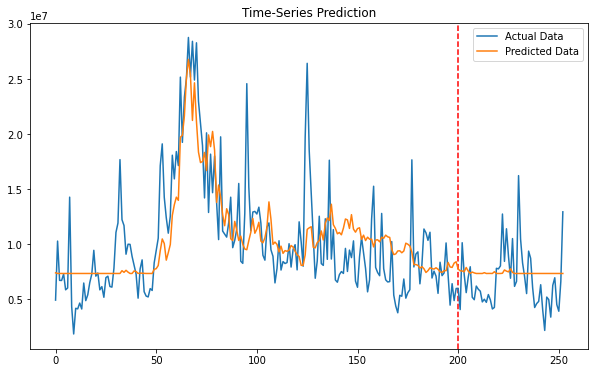

In [12]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [1]:
# 7.6.2 양방향 LSTM

In [2]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
data=pd.read_csv('../chap07/data/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
data['Volume'] = data['Volume'].astype(float)

In [6]:
X=data.iloc[:,:-1]
y=data.iloc[:,5:6]
print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y) 

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [8]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape) 

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [9]:
class biLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(biLSTM, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 
        self.seq_length = seq_length 

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, bidirectional=True, batch_first=True) 
        self.fc =  nn.Linear(hidden_size*2, num_classes) 
        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)) 
        c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))                 
        out, _ = self.lstm(x, (h_0, c_0)) 
        out = self.fc(out[:, -1, :])               
        out = self.relu(out)
        return out

In [10]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5 
hidden_size = 2 
num_layers = 1 

num_classes = 1 
model = biLSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [11]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad() 
 
    loss = criterion(outputs, y_train_tensors) 
    loss.backward()  
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.02142
Epoch: 100, loss: 0.02062
Epoch: 200, loss: 0.02005
Epoch: 300, loss: 0.01957
Epoch: 400, loss: 0.01917
Epoch: 500, loss: 0.01883
Epoch: 600, loss: 0.01854
Epoch: 700, loss: 0.01829
Epoch: 800, loss: 0.01806
Epoch: 900, loss: 0.01786


In [12]:
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

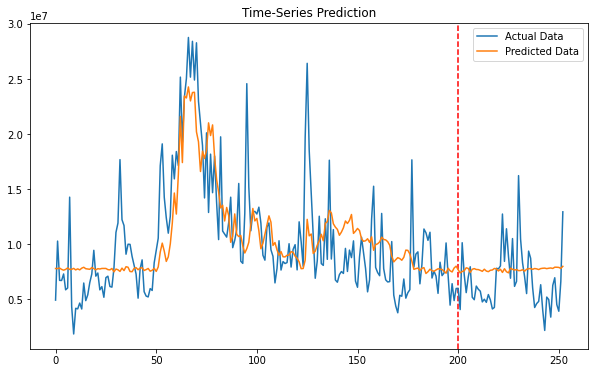

In [13]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 